# Optimizer Example
MNIST CNN example showing comparison between optimizers which were around when Adam was introduced.  This is a classification problem.

Richard Henry, 26-Jul-2024 

Adapted from Keras Documentation. https://keras.io/examples/vision/mnist_convnet/

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.17.0'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|CNN|Contemporary|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.Conv2D(32, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(mClass, 
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, RMSprop

In [7]:
%%time
h0=model_build('rmsprop',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8286 - loss: 0.5718 - val_accuracy: 0.9765 - val_loss: 0.0824
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9688 - loss: 0.1028 - val_accuracy: 0.9822 - val_loss: 0.0579
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9773 - loss: 0.0710 - val_accuracy: 0.9867 - val_loss: 0.0491
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9819 - loss: 0.0571 - val_accuracy: 0.9888 - val_loss: 0.0436
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9852 - loss: 0.0495 - val_accuracy: 0.9890 - val_loss: 0.0422
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9865 - loss: 0.0420 - val_accuracy: 0.9892 - val_loss: 0.0397
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9881 - loss: 0.0384 - val_accuracy: 0.9895 - val_loss: 0.0380
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9887 - loss: 0.

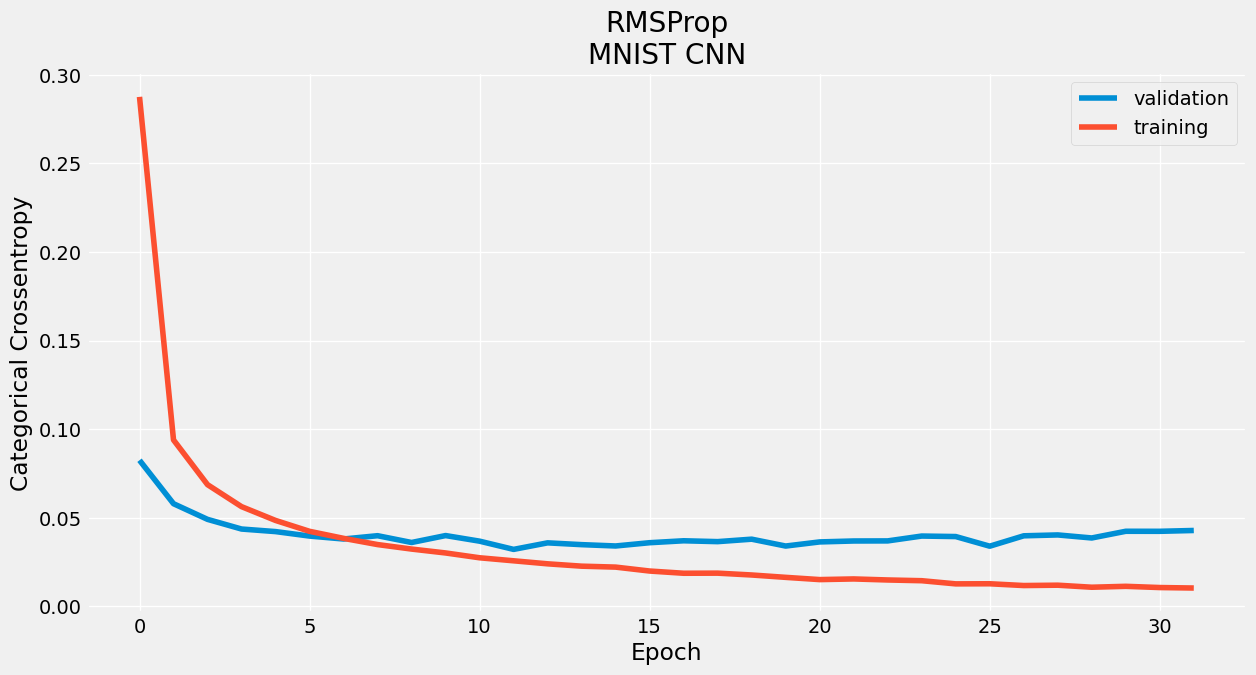

In [8]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_loss'])
plt.plot(h0.history['loss'])
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('RMSProp\nMNIST CNN')
plt.grid(color='white')
plt.show()

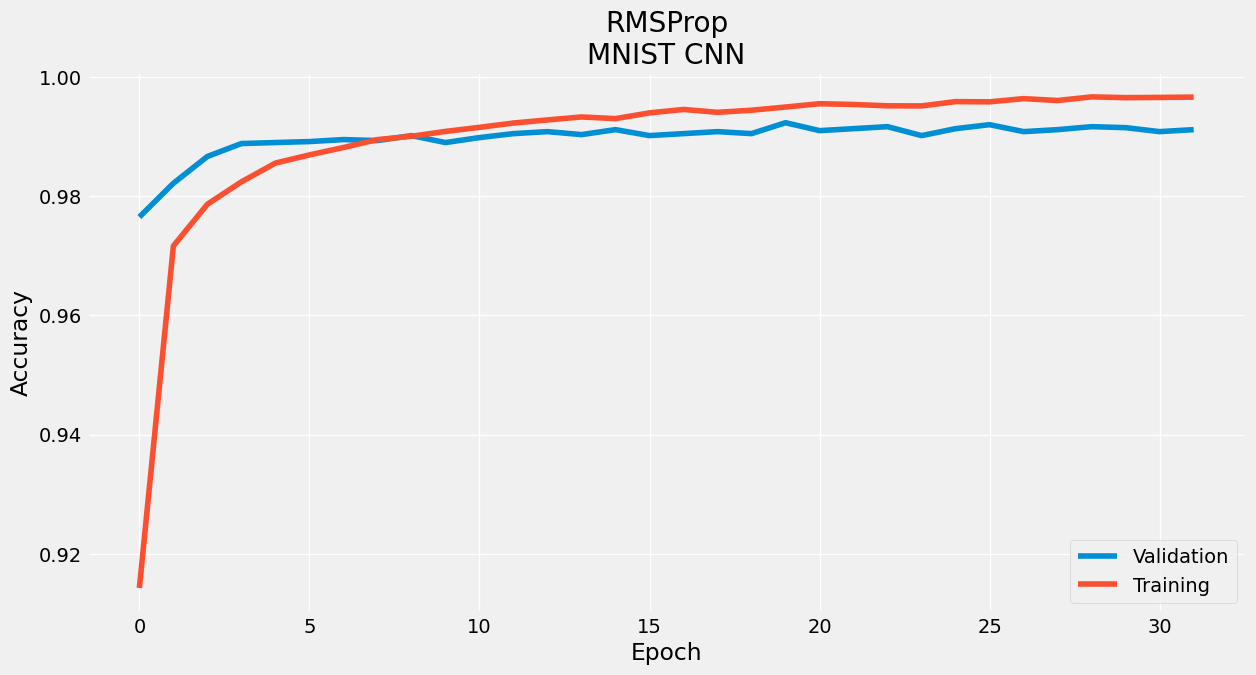

In [9]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h0.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation','Training'])
plt.title('RMSProp\nMNIST CNN')
plt.grid(color='white')
plt.show()

### Second Model, AdaGrad

In [10]:
%%time
h1=model_build('adagrad',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1640 - loss: 2.2863 - val_accuracy: 0.5655 - val_loss: 2.1220
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5357 - loss: 2.0270 - val_accuracy: 0.7990 - val_loss: 1.4736
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7101 - loss: 1.3423 - val_accuracy: 0.8515 - val_loss: 0.7842
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7746 - loss: 0.8412 - val_accuracy: 0.8837 - val_loss: 0.5361
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8106 - loss: 0.6586 - val_accuracy: 0.8980 - val_loss: 0.4308
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8330 - loss: 0.5656 - val_accuracy: 0.9063 - val_loss: 0.3731
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8454 - loss: 0.5159 - val_accuracy: 0.9123 - val_loss: 0.3359
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8561 - loss: 0.

### Third Model, SGD + Nesterov Mommentum

In [11]:
opt012=tf.keras.optimizers.SGD(momentum=0.5,
                               nesterov=True,
                               name='nSGD'
                              )

In [12]:
%%time
h2=model_build(opt012,num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5243 - loss: 1.5379 - val_accuracy: 0.9282 - val_loss: 0.2607
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8920 - loss: 0.3532 - val_accuracy: 0.9537 - val_loss: 0.1690
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9297 - loss: 0.2354 - val_accuracy: 0.9650 - val_loss: 0.1310
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9445 - loss: 0.1828 - val_accuracy: 0.9713 - val_loss: 0.1089
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9540 - loss: 0.1546 - val_accuracy: 0.9725 - val_loss: 0.0982
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9580 - loss: 0.1374 - val_accuracy: 0.9755 - val_loss: 0.0893
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9622 - loss: 0.1240 - val_accuracy: 0.9765 - val_loss: 0.0833
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9650 - loss: 0.

### 4th Model, Adam

In [13]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7978 - loss: 0.6980 - val_accuracy: 0.9757 - val_loss: 0.0869
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9693 - loss: 0.0989 - val_accuracy: 0.9827 - val_loss: 0.0580
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9787 - loss: 0.0695 - val_accuracy: 0.9872 - val_loss: 0.0471
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9823 - loss: 0.0558 - val_accuracy: 0.9877 - val_loss: 0.0433
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9888 - val_loss: 0.0434
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9859 - loss: 0.0439 - val_accuracy: 0.9903 - val_loss: 0.0376
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9876 - loss: 0.0380 - val_accuracy: 0.9903 - val_loss: 0.0390
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9901 - loss: 0.

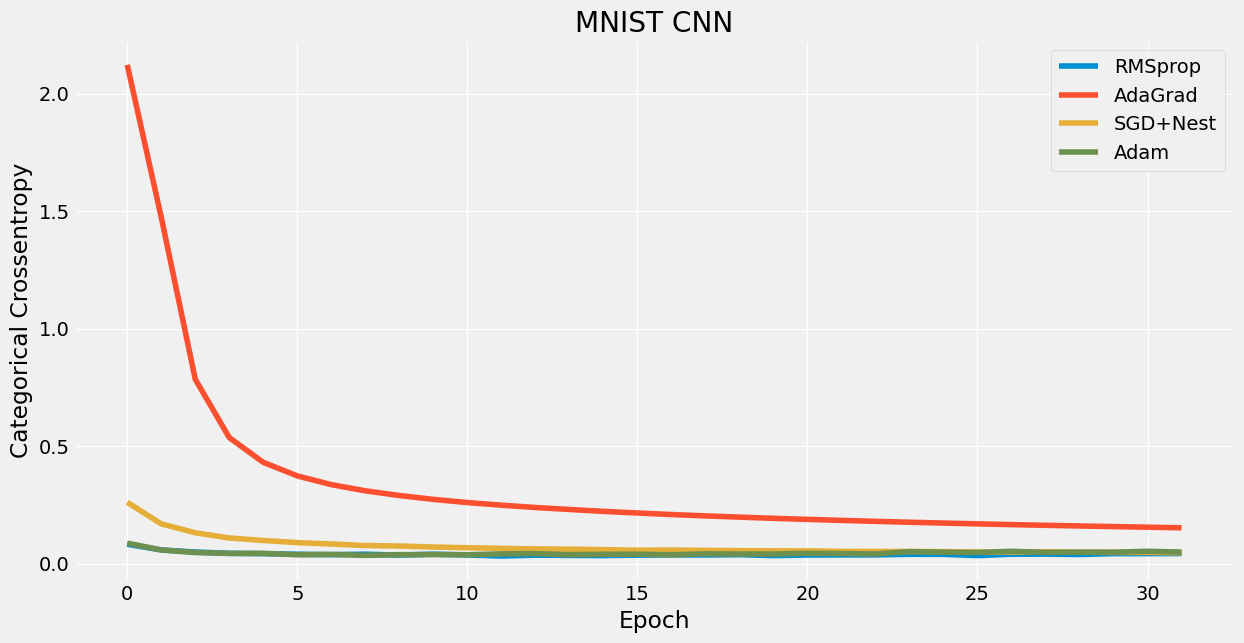

In [14]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_loss'])
plt.plot(h1.history['val_loss'])
plt.plot(h2.history['val_loss'])
plt.plot(h3.history['val_loss'])
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.title('MNIST CNN')
plt.grid(color='white')
plt.show()

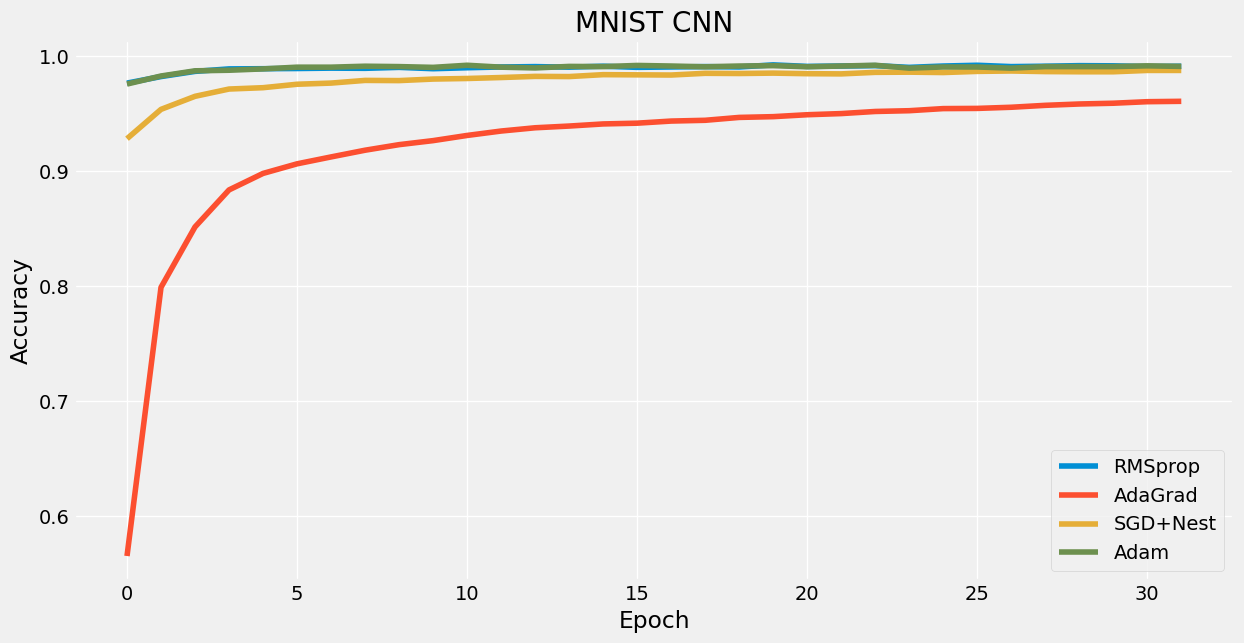

In [15]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.title('MNIST CNN')
plt.grid(color='white')
plt.show()

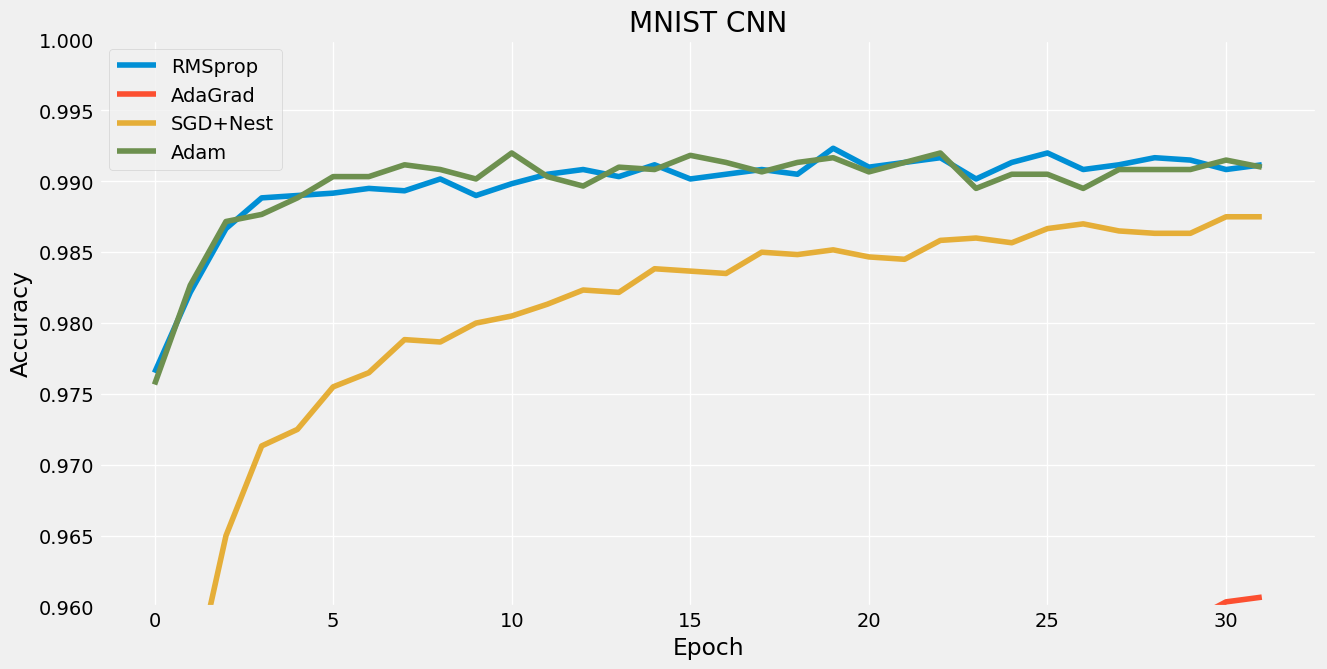

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.title('MNIST CNN')
plt.grid(color='white')
plt.ylim([0.96,1.00])
plt.show()

In [17]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)